In [4]:


# Autoreload modules without having to restart the notebook kernel.
# hi bilbo
# load_ext autoreload
# autoreload 2


import sys
import networkx as nx 
import scipy as sp 
import numpy as np
import matplotlib.pyplot as plt

# Introduce the project directory to your system's path to make data/lib folders visible.
sys.path.insert(1, "..\\")

# Plotting code stolen from Georg's notebook.
# matplotlib inline
font = {'family': 'DejaVu Sans',
        'weight': 'bold',
        'size': 32}
plt.rc('font', **font)

# Personal libraries

In [5]:
#shortest path tree

#Given graph, node, find a tree with shortest path to all nodes
def sp_tree(G, n, k=None):
    sp = nx.Graph()
    sp.add_node(n)
    set = []
    set.append(n)
    i = 0
    while set:
        i +=1
        current = set[0]
        set = set[1:]
        nbs = G.neighbors(current)
        for nb in nbs:
            if nb in sp:
                continue
            set.append(nb)
            sp.add_node(nb)
            sp.add_edge(current, nb)
        if k != None:
            if k <= i:
                break
    return sp



 



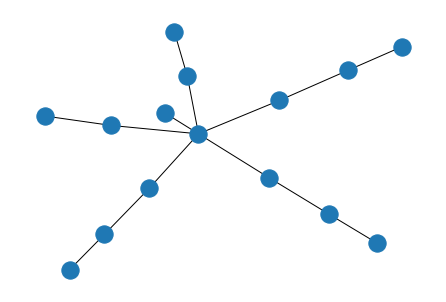

In [6]:
italy = nx.generators.social.florentine_families_graph()
it = sp_tree(italy, 'Medici')
nx.draw(it, )

In [7]:
G0_full = nx.read_weighted_edgelist("/home/tamara/math3888/data/4932.protein.links.v11.5.txt", comments="#", nodetype = str)

In [8]:
G0 = G0_full.copy()

threshold_score = 900

for edge in G0.edges:
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if (weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])



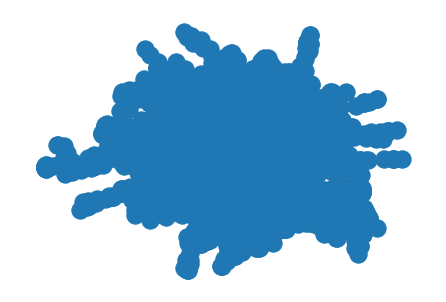

In [9]:
icp_sp = sp_tree(G0, '4932.YER078C')
nx.draw(icp_sp)


In [10]:
x = (icp_sp.number_of_nodes() - icp_sp.number_of_edges())
print(x)#should be 1

1


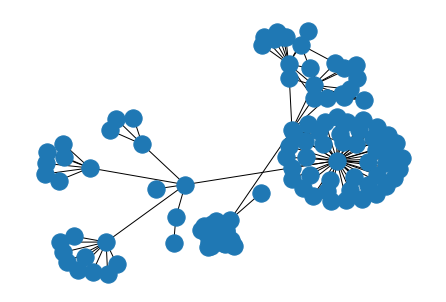

In [11]:
icp_sp_6 = sp_tree(G0, '4932.YER078C', 6)


nx.draw(G0.subgraph(icp_sp_6.nodes))